**Airbnb Listings - Machine Learning**

# Introduction

## Read in libraries, data, and set notebook preferences

In [1]:
#Read in libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sklearn

C:\Users\kishe\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\03_Processed'

#Read in listings data
listings = pd.read_csv(path + '/2020_0213_Listings_Processed.csv',
                       dtype= {'review_scores_accuracy':'category', 'review_scores_checkin':'category', 
                                'review_scores_cleanliness':'category','review_scores_communication':'category',
                            'review_scores_location':'category','review_scores_rating':'category',
                            'review_scores_value':'category'},  index_col=0)

In [3]:
#Set style for matplotlib
plt.style.use('ggplot')

#Set options for pandas
pd.options.display.max_columns =1_000
pd.set_option('display.max_rows', 1_000)

#Surpress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Preview Data

In [4]:
#View data shape and preview 
print('Listings shape: ', listings.shape)
listings.head()

Listings shape:  (98781, 545)


,accommodates,availability_30,availability_365,bathrooms,bedrooms,beds,chlc,chlc_private_rooms,chlc_shared_rooms,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_identity_verified,host_is_superhost,host_response_rate,instant_bookable,is_location_exact,latitude,longitude,maximum_maximum_nights,maximum_minimum_nights,number_of_reviews,number_of_reviews_ltm,price,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,security_deposit,total_amenities,Accessible,Air,Amazon,BBQ,Baby,Babysitter,Balcony,Bath,Bathroom,Bathtub,Beach,Beachfront,Bed,Bedroom,Bidet,Board,Body,Breakfast,Building,Buzzer,Cable,Carbon,Cat,Ceiling,Central,Changing,Chef,Children,Cleaning,Coffee,Convection,Cooking,Crib,DVD,Day,Dining,Disabled,Dishes,Dishwasher,Dog,Doorman,Double,Dryer,Echo,Electric,Elevator,Espresso,Essentials,Ethernet,Exercise,Extra,Family,Fax,Fire,Fireplace,Firm,First,Fixed,Flat,Formal,Free,Full,Game,Garage,Garden,Gas,Ground,Gym,HBO,Hair,Hammock,Handheld,Hangers,Heat,Heated,Heating,High,Host,Hot,Ice,Indoor,Internet,Iron,Ironing,Jetted,Keypad,Kitchen,Kitchenette,Lake,Laptop,Lock,Lockbox,Long,Luggage,Machine,Memory,Microwave,Mini,Mobile,Mountain,Mudroom,Murphy,Netflix,Other,Outdoor,Outlet,Oven,Pack,Paid,Patio,Pets,Piano,Pillow,Play,Pocket,Pool,Printer,Private,Projector,Rain,Refrigerator,Roll,Rooftop,Room,Safety,Self,Shampoo,Shared,Shower,Single,Ski,Smart,Smoke,Smoking,Soaking,Sound,Stair,Stand,Standing,Steam,Step,Stove,Suitable,Sun,Table,Tennis,Terrace,Toilet,Touchless,Walk,Warming,Washer,Waterfront,Well,Wheelchair,Wide,Wifi,Window,Wine,access,accessible,aid,air,allowed,alone,and,area,around,backyard,balcony,bar,bars,basics,bath,bathroom,bed,bedroom,before,blankets,books,card,cellar,chair,charger,check,checkout,clearance,comforts,computer,conditioning,connection,console,cooler,corner,court,covers,crib,darkening,deck,detector,dining,dinnerware,door,doorway,drawer,dropoff,dryer,enter,entrance,entryway,equipment,essentials,events,extinguisher,fan,faucets,fireplace,floor,floors,foam,for,free,fridge,friendly,front,gates,grab,greets,grill,guards,guest,guests,gym,hallway,hallways,head,height,hoist,home,hosting_amenity_49,hosting_amenity_50,hot,hour,intercom,kettle,kid,kit,kitchen,lamps,level,linens,lit,live,living,lock,loungers,machine,maker,mattress,missing,monitor,monoxide,off,out,oven,paper,parking,path,pet,pillows,pit,player,pool,premises,profiling,property,purifier,rack,recommendations,resolution,room,screen,seating,shades,shower,silverware,soap,space,spot,staff,stairs,stays,steam,steps,street,suite,system,table,term,this,toilet,top,towel,toys,translation,travel,tub,valet,view,water,wifi,wireless,with,workspace,you,None,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,photographer,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Daly City,city_San Francisco,city_South San Francisco,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Bayview,neighbourhood_cleansed_Bernal Heights,neighbourhood_cleansed_Castro/Upper Market,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Crocker Amazon,neighbourhood_cleansed_Diamond Heights,neighbourhood_cleansed_Downtown/Civic Center,neighbourhood_cleansed_Excelsior,neighbourhood_cleansed_Financial District,neighbourhood_cleansed_Glen Park,neighbourhood_cleansed_Golden Gate Park,neighbourhood_cleansed_Haight Ashbury

# Data Preparation

## Split data into training and test data

In [5]:
#Import models
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.model_selection import train_test_split

#Prepare data for splitting into train and test sets
X= listings.drop(columns='price').values
y= listings['price'].values

#Check shapes
print('X shape: ', X.shape)
print('y shape: ', y.shape)

C:\Users\kishe\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


X shape:  (98781, 544)
y shape:  (98781,)


In [6]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=42)

#Check shapes
print('Training data shape: {}'.format(X_train.shape))
print('Test data shape: {}'.format(X_test.shape))

Training data shape: (74085, 544)
Test data shape: (24696, 544)


# Feature Selection

## Import libraries

In [7]:
#Import ...
#Scaler
from sklearn.preprocessing import StandardScaler

#Feature_selection models
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2,VarianceThreshold

#Remove low variance features
from sklearn.ensemble import ExtraTreesRegressor

#Pipeline
from sklearn.pipeline import Pipeline

#CV
from sklearn.model_selection import cross_validate

## Principal Component Analysis

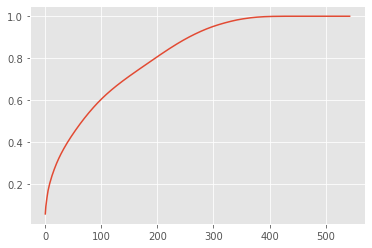

In [10]:
#Init PCA
from sklearn.decomposition import PCA

#Init StandardScaler
SC = StandardScaler()

#Fit and transform training data
X_train_transformed = SC.fit_transform(X_train)

#Init PCA and fit to training data
pca = PCA().fit(X_train_transformed)

#Visualize explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))


## Initial preprocessing pipeline

In [11]:
#Init ExtraTreesRegressor
feature_importance = ExtraTreesRegressor(n_estimators=50, n_jobs=-1,verbose=1,random_state=42)

#Create pipeline that scales data, removes low variance feats, and extracts feat importances
feature_pipe = Pipeline(steps = [('Normalizer', StandardScaler()),#Step1. Normalize training data
    ('Variance_Selector', VarianceThreshold(threshold=(.8 * (1 - .8)))),#Step2.Remove low variance features
    ('Feature_Importances',feature_importance)]) #Step3.View Feature Importances

#Fit to data
feature_pipe.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.7min finished


Pipeline(memory=None,
         steps=[('Normalizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Variance_Selector',
                 VarianceThreshold(threshold=0.15999999999999998)),
                ('Feature_Importances',
                 ExtraTreesRegressor(bootstrap=False, criterion='mse',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=50, n_jobs=-1,
                                     oob_score=False, random_state=42,
                                     verbose=1, warm_start=False))],
         verbose=False)

## Feature Importances from Initial preprocessor pipeline

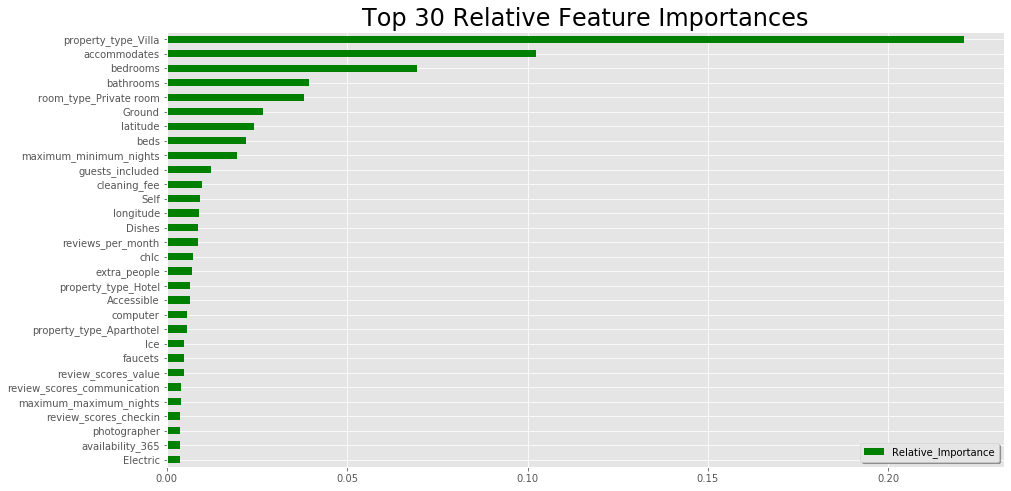

In [27]:
#Function that visualizes feature importances from feature_pipe
def feature_importance_viz(cols, ft_importances, feat_count, figsize, fontdict=None):
    """
    cols: feature names from df where training data was fit from 
    ft_importances: feature importances from pipe/model
    feat_count: Number of top ft_importances you would like on plot
    figsize: Set fig size for plot
    fontdict(optional) : Set font for plot title
    """
    df = pd.DataFrame(list(zip(cols,ft_importances)), columns = ['Feature', 'Relative_Importance'])
    top_feats = df.sort_values(by = 'Relative_Importance', ascending = False).head(feat_count)
    ax = top_feats.plot(kind = 'barh', x='Feature', figsize=figsize,color = 'green') 
    ax.set_title('Top {} Relative Feature Importances'.format(feat_count), fontdict = fontdict)
    ax.set_ylabel('')
    ax.invert_yaxis()
    ax.legend(frameon = True, fancybox = True, shadow = True)

#Set font_dict
font_dict = {'fontsize' : 24, 'fontweight' : 550}
feature_importance_viz(listings.columns, feature_pipe['Feature_Importances'].feature_importances_, 30, (15,8), fontdict=font_dict)


## Feature selection and transformation

In [22]:
#Instantiate SelectFromModel using feature_importance
selector = SelectFromModel(feature_importance, threshold='mean')

#Create pipeline 
preprocessor = Pipeline(steps = [('Normalizer', StandardScaler()),#Step1. Normalize training data
    ('Variance_Selector', VarianceThreshold(threshold=(.8 * (1 - .8)))),#Step2.Remove low variance features
    ('Selector',selector)]) #Step3.Select Features that meet threshold

#Fit to data
preprocessor.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished


Pipeline(memory=None,
         steps=[('Normalizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Variance_Selector',
                 VarianceThreshold(threshold=0.15999999999999998)),
                ('Selector',
                 SelectFromModel(estimator=ExtraTreesRegressor(bootstrap=False,
                                                               criterion='mse',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_s

In [23]:
#Transform training and test data
X_train_t = preprocessor.transform(X_train)
X_test_t = preprocessor.transform(X_test)

#View new training/test data shape after transformation
print('New training data shape:', X_train_t.shape)
print('New test data shape:', X_test_t.shape)

New training data shape: (74085, 79)
New test data shape: (24696, 79)


# Design base model pipeline

Testing a list of potential regressors that will work well on sparse data. Will optimize best base model.

In [24]:
#Supervised learning techniques
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor

#Create list of regression models to iterate over and test in pipeline
regressors = [DecisionTreeRegressor(random_state = 42),
              RandomForestRegressor(random_state = 42, n_jobs=-1), 
              GradientBoostingRegressor(random_state = 42), 
              BaggingRegressor(random_state = 42, n_jobs=-1),
             XGBRegressor(random_state = 42 )]

In [25]:
#Run base models to see which performs best on training data
scoring = ['r2','neg_mean_absolute_error','neg_mean_squared_error']

In [26]:
for regressor in regressors:
    pipe = Pipeline(steps=[('Model', regressor)], verbose=False) #Fit regressor
    scores  = cross_validate(pipe,X_train_t, y_train,scoring=scoring, cv =5)
    print('=============================================')
    print(regressor)
    print('Mean R2 Score: ', np.mean(scores['test_r2']))
    print('Mean RMSE Score: ', np.mean(np.sqrt(-1 * scores['test_neg_mean_squared_error'])))
    print('Mean MAE Score: ', np.mean(scores['test_neg_mean_absolute_error']))
    print('=============================================')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')
Mean R2 Score:  0.8985191405163804
Mean RMSE Score:  0.22069518181042716
Mean MAE Score:  -0.06046000898897889
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
Mean R2 Score:  0.9424352773149778
Mean RMSE Score:  0.1661379281882201

RandomForestRegressor will be the model of choice. Let's see if we can reduce that average MSE.

# Tune Hyperparameters

## Random Search

In [27]:
print('Random Forest parameters: ', RandomForestRegressor().get_params)

Random Forest parameters:  <bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)>


In [28]:
#Set values for RandomForestRegressor hyperparameters
max_depth = [20, 30, 40]

max_features= ['auto', 'sqrt', 'log2']

n_estimators = [200, 250, 300]

bootstrap=[True, False]

min_samples_split=[6,8, 10]

min_samples_leaf = [1,3,5,7]

param_grid = {'max_depth' : max_depth,
            'max_features':max_features,
            'n_estimators':n_estimators,
            'bootstrap': bootstrap,
              'min_samples_split':min_samples_split,
            'min_samples_leaf' : min_samples_leaf,
}

In [29]:
#
from sklearn.model_selection import RandomizedSearchCV
RFR_random = RandomizedSearchCV(RandomForestRegressor(random_state = 42, n_jobs=-1), param_distributions= param_grid, n_jobs=-1,
                           scoring = scoring,refit='r2', cv=5,
                                verbose =1)

print('View random_model parameters: ', RFR_random.get_params)

View random_model parameters:  <bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=F

In [30]:
#Fit model to data
RFR_random.fit(X_train_t, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 25.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=False,
                                                   random_state...


In [41]:
#View statistics and best parameters from RFR_random model
print('Best score from RFR_random:',RFR_random.best_score_)
print('CV Results \n-----------\nR2: ',np.mean(RFR_random.cv_results_['mean_test_r2']))
print('RMSE: ',np.mean(np.sqrt(-1 * (RFR_random.cv_results_['mean_test_neg_mean_squared_error']))))
print('MAE: ',np.mean(RFR_random.cv_results_['mean_test_neg_mean_absolute_error']))
print('\nBest model parameters: ',RFR_random.best_params_ )

Best score from RFR_random: 0.9451817984994751
CV Results 
-----------
R2:  0.9094092871793164
RMSE:  0.20711586113814598
MAE:  -0.1098661489859448

**Best model parameters**:  {'n_estimators': 250, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}


## Gridsearch

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
#Set values for RandomForestRegressor hyperparameters
max_depth = [35,40,45]

max_features= ['log2']

n_estimators = [225,250,275]

bootstrap=[False]

min_samples_split = [5,6]
    
min_samples_leaf = [2,3]

param_grid = {'max_depth' : max_depth,
            'max_features':max_features,
            'n_estimators':n_estimators,
            'bootstrap': bootstrap,
            'min_samples_leaf' : min_samples_leaf,
            'min_samples_split' : min_samples_split
}

In [44]:
#Create GridSearch
RFR_optimized = GridSearchCV(RandomForestRegressor(random_state = 42, n_jobs=-1), param_grid=param_grid,
                        n_jobs= -1, scoring=scoring,refit='r2',cv=5, verbose=1)

#Fit to data
RFR_optimized.fit(X_train_t, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 27.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [3

In [46]:
#View statistics and best parameters from RFR_optimized model
print('Best score from RFR_optimized:',RFR_optimized.best_score_)
print('CV Results \n-----------\nR2: ',np.mean(RFR_optimized.cv_results_['mean_test_r2']))
print('RMSE: ',np.mean(np.sqrt(-1 * (RFR_optimized.cv_results_['mean_test_neg_mean_squared_error']))))
print('MAE: ',np.mean(RFR_optimized.cv_results_['mean_test_neg_mean_absolute_error']))
print('\nBest model parameters: ',RFR_optimized.best_params_ )

Best score from RFR_optimized: 0.9533253718337071
CV Results 
-----------
R2:  0.9489804657392796
RMSE:  0.15650079271933276
MAE:  -0.0727602004434294

Best model parameters:  {'bootstrap': False, 'max_depth': 35, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 275}


## Visualize the results

In [1]:
#Plot feature importances    
feature_importance_viz(listings.columns, RFR_optimized.best_estimator_.feature_importances_, 25,(15,10),fontdict=font_dict)

NameError: name 'feature_importance_viz' is not defined

## Update parameters to optimized values for final model

In [48]:
#Set values for RandomForestRegressor hyperparameters
max_depth = [35]

max_features= ['log2']

n_estimators = [275]

bootstrap=[False]

min_samples_leaf = [2]

min_samples_split = [5]

param_grid = {'max_depth' : max_depth,
            'max_features':max_features,
            'n_estimators':n_estimators,
            'bootstrap': bootstrap,
            'min_samples_leaf' : min_samples_leaf,
            'min_samples_split' : min_samples_split
}

#Update model with optimized hyperparameters
RFR_optimized = GridSearchCV(RandomForestRegressor(random_state = 42, n_jobs=-1), param_grid=param_grid,
                        n_jobs= -1, scoring=scoring,refit='r2', verbose=1, cv=10)

#Check
print('Finalized model: \n', RFR_optimized)

Finalized model: 
 GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [Fal

# Write Files and Final Model

In [49]:
# from sklearn.externals import joblib

# #Set path to write test data
# path =  r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\04_Models'

# # save the model to disk
# filename = '/2020_0213_Price_Predictor_Final.sav'
# joblib.dump(RFR_optimized, path + filename)

C:\Users\kishe\Miniconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['C:\\Users\\kishe\\Documents\\Data Science\\Projects\\Python Projects\\In Progress\\Air BnB - SF\\Data\\04_Models/2020_0213_Price_Predictor_Final.sav']

In [50]:
# #Set path to write test data
# path =  r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\04_Models'

# #Write Test data to csv
# pd.DataFrame(X_test_t).to_csv(path + '/2020_0213_Test_Data.csv', index=None)
# pd.DataFrame(y_test).to_csv(path + '/2020_0213_Test_Labels.csv', index=None)